# Abalone data analysis

This notebook was created in class as we walked through the analysis done by [Amo Moloko in their Kaggle notebook](https://www.kaggle.com/code/princeashburton/abalone-analysis-supervised-learning/notebook). 


In [5]:
#Standard libs
import numpy as np 
import pandas as pd 

#Data Visualisation libs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Feature engineering, metrics and modeling libs
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import Imputer
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
#from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

#Detect Missing values
#import missingno as msno


import os

In [7]:
abalone = pd.read_csv('../../share/abalone.csv')

In [8]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
abalone.shape

(4177, 9)

/apps/python/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal'}, xlabel='Rings'>

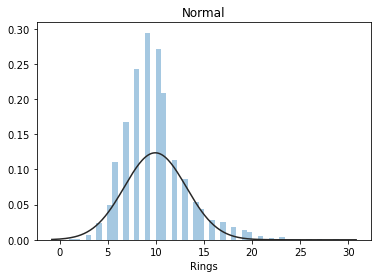

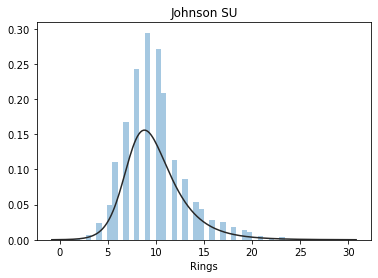

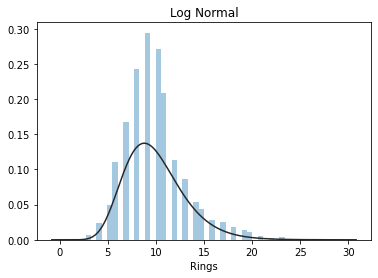

In [12]:
rings = abalone['Rings']
plt.figure(1);plt.title('Normal')
sns.distplot(rings,kde=False,fit=st.norm)
plt.figure(2);plt.title('Johnson SU')
sns.distplot(rings,kde=False,fit=st.johnsonsu)
plt.figure(3);plt.title('Log Normal')
sns.distplot(rings,kde=False,fit=st.lognorm)

In [13]:
numeric_features = abalone.select_dtypes(include=[np.number])
correlation = numeric_features.corr()
print(correlation['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


/apps/python/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


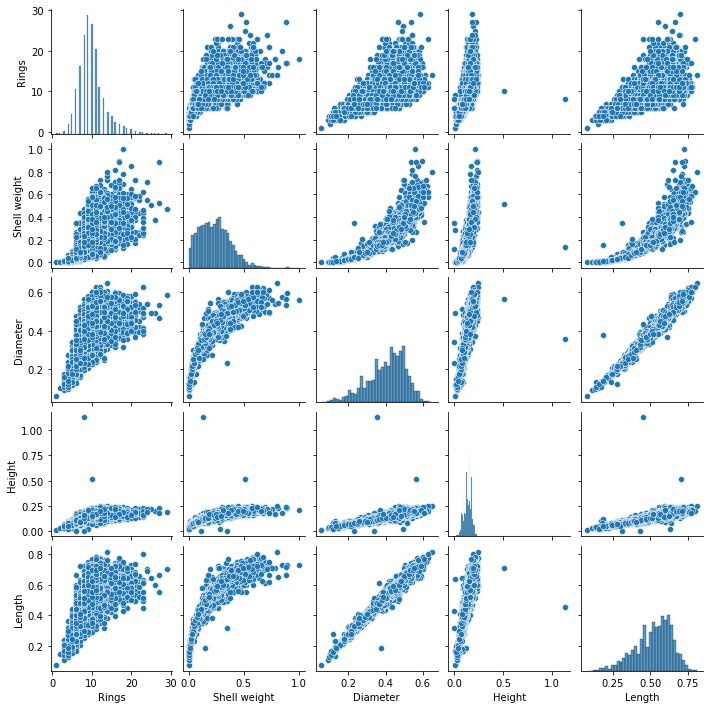

In [14]:
cols = ['Rings','Shell weight','Diameter','Height','Length']
sns.pairplot(abalone[cols],size=2,kind='scatter')
plt.show()

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

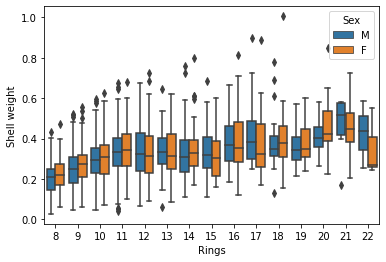

In [15]:
f = (abalone.loc[abalone['Sex'].isin(['M','F'])]
      .loc[:,['Shell weight','Rings','Sex']])

f = f[f["Rings"] >= 8]
f = f[f["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=f)

In [16]:
from scipy import stats
z= np.abs(stats.zscore(abalone.select_dtypes(include=[np.number])))
print(z)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0     0.574558  0.432149  1.064424      0.641898        0.607685   
1     1.448986  1.439929  1.183978      1.230277        1.170910   
2     0.050033  0.122130  0.107991      0.309469        0.463500   
3     0.699476  0.432149  0.347099      0.637819        0.648238   
4     1.615544  1.540707  1.423087      1.272086        1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686  0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  
0           0.726212      0.638217  1.571544  
1           1.205221      1.212987  0.910013  
2           0.356690      0.207139  0.2896

In [17]:
abalone_o = abalone[(z < 3).all(axis=1)]

In [18]:
print("Shape of Abalones with outliers: "+ str(abalone.shape) , 
      "Shape of Abalones without outliers: " + str(abalone_o.shape))

Shape of Abalones with outliers: (4177, 9) Shape of Abalones without outliers: (4027, 9)


In [19]:
low_cardinality_cols = [cname for cname in abalone_o.columns if
                        abalone_o[cname].nunique() < 10 and 
                       abalone_o[cname].dtype == "object"]
numeric_cols = [cname for cname in abalone_o.columns if
                                 abalone_o[cname].dtype in ['int64','float64']]

my_cols = low_cardinality_cols + numeric_cols
abalone_predictors = abalone_o[my_cols]

In [21]:
abalone_predictors.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
abalone_predictors.dtypes.sample(7)

Diameter          float64
Height            float64
Shucked weight    float64
Shell weight      float64
Length            float64
Rings               int64
Sex                object
dtype: object

In [23]:
abalone_encoded_predictors = pd.get_dummies(abalone_predictors)

In [24]:
abalone_encoded_predictors.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [25]:
abalone_encoded_predictors.shape

(4027, 11)

In [26]:
cross_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Sex_F','Sex_I','Sex_M']
X = abalone_encoded_predictors[cross_cols]
y = abalone_encoded_predictors.Rings

decision_pipeline = make_pipeline(DecisionTreeRegressor())
decision_scores = cross_val_score(decision_pipeline, X,y,scoring='neg_mean_absolute_error')

print('MAE %2f' %(-1 * decision_scores.mean()))

MAE 1.960946


In [28]:
dt_train_X,dt_test_X,dt_train_y,dt_test_y = train_test_split(X,y)
decision_split_pipeline = make_pipeline(DecisionTreeRegressor(max_leaf_nodes=5))
decision_split_pipeline.fit(dt_train_X,dt_train_y)
decision_tree_prediction = decision_split_pipeline.predict(dt_test_X)
print("MAE: " + str(mean_absolute_error(decision_tree_prediction,dt_test_y)))

MAE: 1.7314335217444494


In [29]:
acc_decision = decision_split_pipeline.score(dt_test_X,dt_test_y)
print("Acc:", acc_decision )


Acc: 0.3627557888623082


In [32]:
train_X,test_X,train_y,test_y = train_test_split(X.values,y.values,test_size=0.25)

In [33]:
xgb_model = XGBRegressor()
xgb_model.fit(train_X,train_y,verbose=False)
xgb_preds = xgb_model.predict(test_X)
print("MAE: " + str(mean_absolute_error(xgb_preds,test_y)))
print("Accuracy:",xgb_model.score(test_X,test_y))

MAE: 1.4939710442809149
Accuracy: 0.4932672393354267


In [34]:
xgb_model_II = XGBRegressor(n_estimators=1000,learning_rat=0.05)
xgb_model_II.fit(train_X,train_y,early_stopping_rounds=5,
             eval_set=[(test_X,test_y)],verbose=False)
xgb_preds = xgb_model_II.predict(test_X)
print("MAE: " + str(mean_absolute_error(xgb_preds,test_y)))
print("Accuracy:",xgb_model_II.score(test_X,test_y))

[10:27:26] WARNING: ../src/learner.cc:627: 
Parameters: { "learning_rat" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MAE: 1.3737468586896122
Accuracy: 0.5383360619126952


/apps/python/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


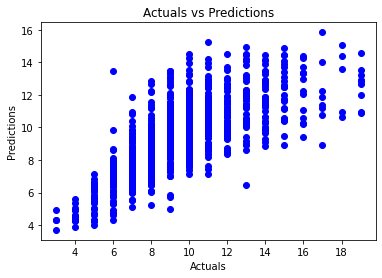

In [35]:
plt.scatter(test_y,xgb_preds,color='blue')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()